In [12]:
import pandas as pd
import yfinance as yf

# Scarica lista S&P500 da Wikipedia
tickers = pd.read_csv("constituents.csv")["Symbol"].tolist()

# Alcuni ticker hanno un punto (es. BRK.B, BF.B) → Yahoo li vuole con trattino
tickers = [t.replace(".", "-") for t in tickers]

print(f"Totale ticker: {len(tickers)}")
print(tickers[:10])
print(tickers[-10:])

Totale ticker: 503
['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']
['WMB', 'WTW', 'WDAY', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZTS']


In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for multiple tockets
#50 tockets
data = yf.download(tickers, start="2023-01-01", end="2025-01-01")['Close']
data = data.dropna(axis=1, how='all')
print(data.shape) 

/tmp/ipykernel_30002/85012612.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2023-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  503 of 503 completed


(502, 503)


cleaning

In [48]:
nan_frac = data.isna().mean()

# tieni solo colonne con meno del 5% di NaN
ok_cols = nan_frac[nan_frac <= 0.05].index
data_clean = data[ok_cols]

print(f"Titoli rimasti dopo filtro: {len(ok_cols)}")

data_clean = data_clean.fillna(method='ffill').fillna(method='bfill')

subset = data_clean.iloc[:, :100]
print(subset.shape)
#lavori su 100 titoli per evitare sovraccarico di memoria


Titoli rimasti dopo filtro: 499
(502, 100)


/tmp/ipykernel_30002/3250211763.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean = data_clean.fillna(method='ffill').fillna(method='bfill')


In [43]:
## Dati reali

In [49]:
import sys
sys.path.append("../src")
from finrmt.data import returns

#for multiple tockets defined before

returns = returns(subset)

R = returns.dropna(how="any").to_numpy(dtype=float)   # shape: (T, N)

T, N = R.shape
print("R shape:", R.shape)
print("First 5 rows of R:\n", R[:5])

R shape: (501, 100)
First 5 rows of R:
 [[ 0.66089483  0.66010169  0.55296074  1.79207239  1.23228091  0.26746413
  -0.27179675  0.57976127  1.12161251 -1.90706196  0.36184573  0.76123025
   0.41427173  0.54203717 -1.25163918  0.30528011  0.965884    0.85609485
   1.07184515  0.58802849  1.29172886  1.88608781  1.05225571  0.93746447
   1.03994047  0.68292814  0.29090573  0.14359287  0.70122674  0.40588282
   1.24127898 -0.51042842 -2.32511039  0.85312777  1.76865593 -1.42637347
   0.00507157  0.92815605  1.10742167  1.39509895  1.01944734  0.56887064
   1.28262831  0.33672756  1.51664788  1.53570537  0.02296973  1.36850857
   0.40434121  2.12163003  1.15107775  0.55406046  1.36463514  1.00718474
   0.63626295  1.44589961  0.58369399 -0.3398062  -0.36906967  1.73751473
   2.22053782 -1.82420929  0.68261301  1.02135496  0.34594193  1.2168749
   1.58825673  1.27388009  0.7993948   1.1273757   0.03754188  1.49911649
  -0.32297439  0.19173434  0.48826611  0.54871461  1.33031974 -1.28703806

C shape: (100, 100)
First 5 rows of C:
 [[ 0.99800399  0.17726419  0.14894612  0.22790289  0.31759503]
 [ 0.17726419  0.99800399  0.00379539  0.30355148  0.08984624]
 [ 0.14894612  0.00379539  0.99800399 -0.03182229  0.25842726]
 [ 0.22790289  0.30355148 -0.03182229  0.99800399  0.09928617]
 [ 0.31759503  0.08984624  0.25842726  0.09928617  0.99800399]]


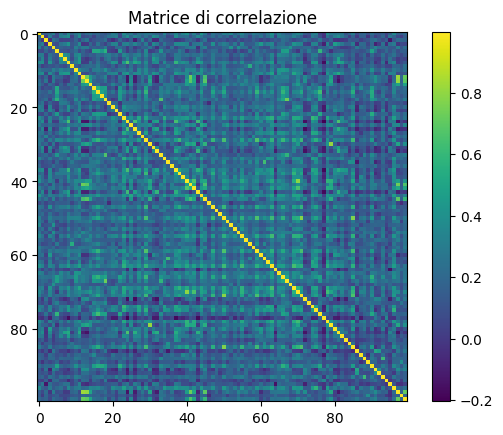

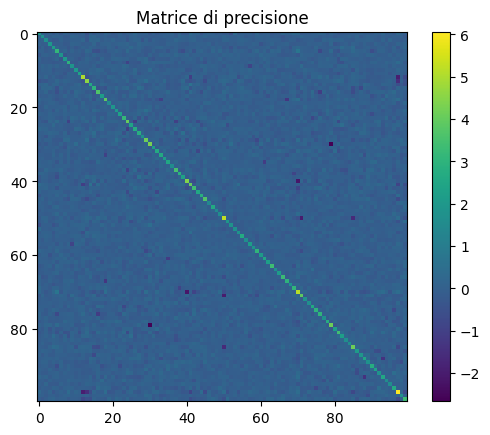

In [ ]:
C = (R.T @ R) / T
W = np.linalg.inv(C)
print("C shape:", C.shape)
print("First 5 rows of C:\n", C[:5, :5])

plt.imshow(C, cmap='viridis')
plt.colorbar()
plt.title("Matrice di correlazione")
plt.show()

#matrice di precisione
plt.imshow(W, cmap='viridis')
plt.colorbar()
plt.title("Matrice di precisione")
plt.show()


In [71]:
import sys
sys.path.append("../src")
from finrmt.cov import kendall
from finrmt.cov import pearson

C_kendall = kendall(returns)
C_pearson = pearson(returns)

plt.imshow(C_kendall, cmap='viridis')
plt.colorbar()
plt.title("Matrice di correlazione (Kendall)")
plt.show()

plt.imshow(C_pearson, cmap='viridis')
plt.colorbar()
plt.title("Matrice di correlazione (Pearson)")
plt.show()

ImportError: cannot import name 'kendall' from 'finrmt.cov' (/home/ceci/ProblemSolving/notebooks/../src/finrmt/cov.py)